1. Load and Preview Dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [4]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nickrolen","key":"c3bdf2e2a821d97502d78c4ad40b7c5e"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d rohitsahoo/sales-forecasting

Dataset URL: https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting
License(s): GPL-2.0
  0% 0.00/480k [00:00<?, ?B/s]
100% 480k/480k [00:00<00:00, 611MB/s]


In [7]:
!unzip sales-forecasting.zip
df = pd.read_csv('train.csv')

Archive:  sales-forecasting.zip
  inflating: train.csv               


In [8]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


2. Data Cleaning (Python)

In [9]:
df.drop_duplicates(inplace=True)
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month_name()
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Year,Month
0,1,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,November
1,2,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,November
2,3,CA-2017-138688,2017-06-12,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,June
3,4,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,October
4,5,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,October


3. EDA

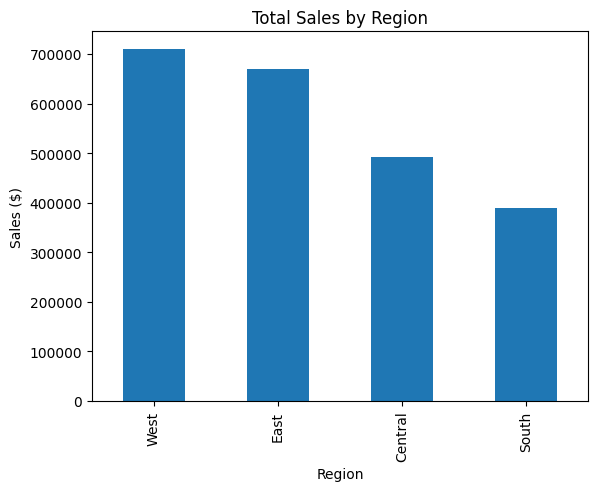

In [10]:
## SALES BY REGION
sales_by_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
sales_by_region.plot(kind='bar', title='Total Sales by Region')
plt.ylabel('Sales ($)')
plt.xlabel('Region')
plt.show()

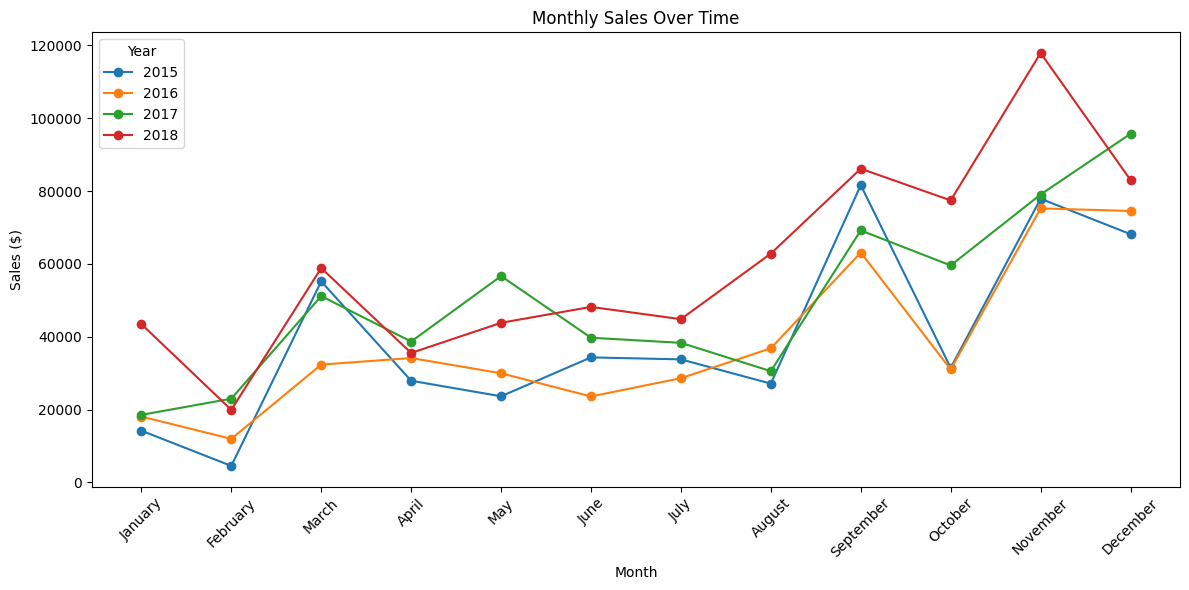

In [11]:
## SALES OVER TIME
sales_over_time = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
sales_over_time['Month'] = pd.Categorical(
    sales_over_time['Month'],
    categories=[ 'January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December'],
    ordered=True)
sales_over_time = sales_over_time.sort_values(['Year', 'Month'])
plt.figure(figsize=(12, 6))
for year in sales_over_time['Year'].unique():
    data = sales_over_time[sales_over_time['Year'] == year]
    plt.plot(data['Month'], data['Sales'], marker='o', label=str(year))
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.legend(title='Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

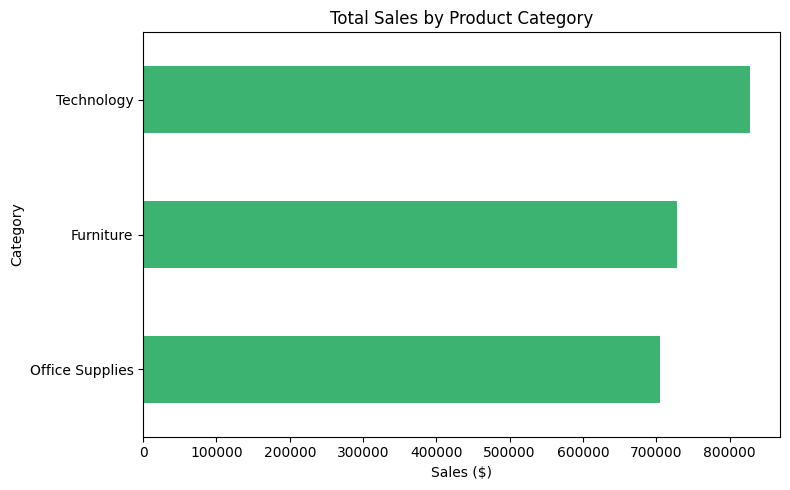

In [12]:
## SALES BY PRODUCT CATEGORY
sales_by_category = df.groupby('Category')['Sales'].sum().sort_values()
plt.figure(figsize=(8, 5))
sales_by_category.plot(kind='barh', color='mediumseagreen')
plt.title('Total Sales by Product Category')
plt.xlabel('Sales ($)')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

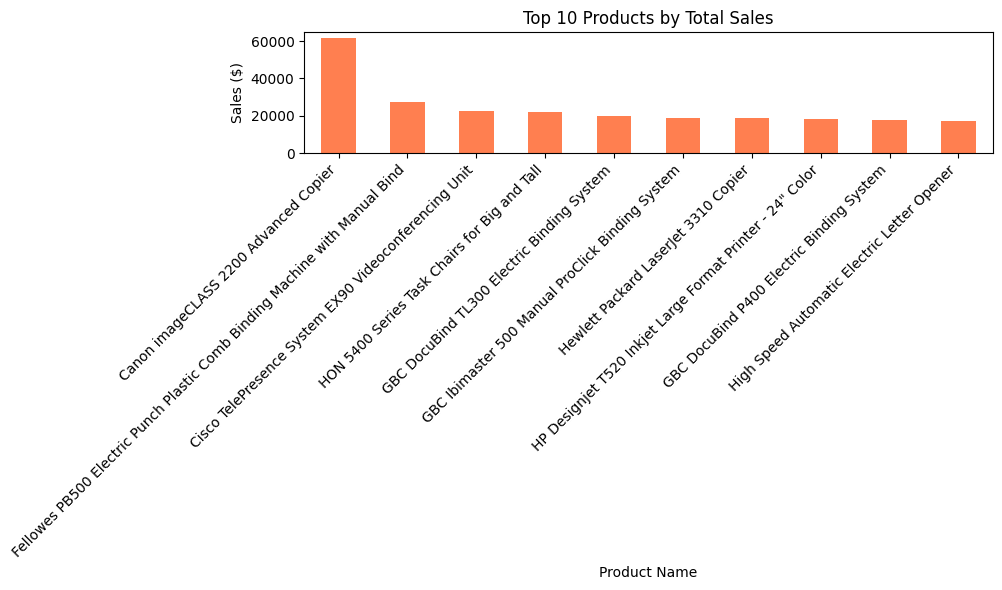

In [13]:
## TOP 10 PRODUCTS BY SALES
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='coral')
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Product Name')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

4. SQL Queries

In [17]:
conn = sqlite3.connect("sales.db")
sales_summary.to_sql("sales_summary", conn, if_exists="replace", index=False)

2495

In [18]:
## TOP 10 COMBINATION OF REGION + CATEGORY
query = """
SELECT
    Region,
    Category,
    SUM(Sales) AS TotalSales
FROM sales_summary
GROUP BY Region, Category
ORDER BY TotalSales DESC
LIMIT 10
"""

result = pd.read_sql_query(query, conn)
result

,Region,Category,TotalSales
0,East,Technology,263116.5270
1,West,Technology,247404.9300
2,West,Furniture,245348.2455
3,West,Office Supplies,217466.5090
4,East,Furniture,206461.3880
5,East,Office Supplies,199940.8110
6,Central,Technology,168739.2080
7,Central,Office Supplies,163590.2430
8,Central,Furniture,160317.4622
9,South,Technology,148195.2080


In [20]:
## TOP SELLING CATEGORY PER REGION CTE
query = """
WITH region_category_sales AS (
    SELECT
        Region,
        Category,
        SUM(Sales) AS TotalSales
    FROM sales_summary
    GROUP BY Region, Category
)
SELECT
    Region,
    Category,
    TotalSales
FROM region_category_sales
WHERE (Region, TotalSales) IN (
    SELECT
        Region,
        MAX(TotalSales)
    FROM region_category_sales
    GROUP BY Region
)
ORDER BY TotalSales DESC
"""
pd.read_sql_query(query, conn)

,Region,Category,TotalSales
0,East,Technology,263116.527
1,West,Technology,247404.930
2,Central,Technology,168739.208
3,South,Technology,148195.208


In [22]:
## SALES BY YEAR PER REGION PLUS PERCENT GROWTH
query = """
SELECT
    Region,
    Year,
    SUM(Sales) AS YearlySales,
    ROUND(
        (SUM(Sales) - LAG(SUM(Sales)) OVER (PARTITION BY Region ORDER BY Year))
        /
        LAG(SUM(Sales)) OVER (PARTITION BY Region ORDER BY Year)
        * 100, 2
    ) AS YoY_Growth_Percent
FROM sales_summary
GROUP BY Region, Year
ORDER BY Region, Year
"""
pd.read_sql_query(query, conn)

,Region,Year,YearlySales,YoY_Growth_Percent
0,Central,2015,102920.5206,NaN
1,Central,2016,102425.1724,-0.48
2,Central,2017,145673.8800,42.22
3,Central,2018,141627.3402,-2.78
4,East,2015,127652.8190,NaN
5,East,2016,153225.1830,20.03
6,East,2017,178511.5380,16.50
7,East,2018,210129.1860,17.71
8,South,2015,103374.9055,NaN
9,South,2016,70076.0825,-32.21


5. Export Dataset

In [23]:
sales_summary = df.groupby(
    ['Region', 'Category', 'Sub-Category', 'Year', 'Month']
)['Sales'].sum().reset_index()
sales_summary.head()

,Region,Category,Sub-Category,Year,Month,Sales
0,Central,Furniture,Bookcases,2015,January,141.9600
1,Central,Furniture,Bookcases,2015,June,406.0056
2,Central,Furniture,Bookcases,2015,November,492.1092
3,Central,Furniture,Bookcases,2015,September,793.9628
4,Central,Furniture,Bookcases,2016,August,1056.5992


In [26]:
yoy_df = pd.read_sql_query(query, conn)
yoy_df.to_csv("yoy_growth.csv", index=False)

In [24]:
top_products = df.groupby(['Product Name'])['Sales'].sum().reset_index()
top_products = top_products.sort_values(by='Sales', ascending=False)
top_products.to_csv('/content/top_products.csv', index=False)

In [27]:
sales_summary.to_csv('/content/sales_summary.csv', index=False)
from google.colab import files
files.download('sales_summary.csv')
files.download('top_products.csv')
files.download('yoy_growth.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>